In [ ]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/energy-ml-project


/home/samir/miniconda3/envs/machine-learning/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import pandas as pd
import os
import numpy as np

datasets_path = "data"
csv_files: list[str] = []
for root, dirs, files in os.walk(datasets_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

data = dict()
for file in csv_files:
    data[file.split('/')[-1].split('.')[0]] = pd.read_csv(file,index_col=0)


# Check that the timestamps are the same for all recordings
key = 'end'
t_diff = np.zeros((len(data), len(data)))
for i,value1 in enumerate( data.values()):
    for j, value2 in enumerate( data.values()):
        d = np.sum(value1[key] - value2[key])
        t_diff[i,j] = d

print(t_diff)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Fuse data into 1 dataframe
fused_dataframe = pd.DataFrame({
    **{'Time': data['SOLAR']['start']},
    **{k: v['values'] for k, v in data.items()}
})
fused_dataframe

,Time,BIOMASS,FOSSIL_GAS,FOSSIL_HARD_COAL,FOSSIL_OIL,HYDRO_PUMPED_STORAGE,HYDRO_RUN_OF_RIVER_AND_POUNDAGE,HYDRO_WATER_RESERVOIR,NUCLEAR,SOLAR,TOTAL,WASTE,WIND_OFFSHORE,WIND_ONSHORE
0,1741734000,356,3743,0,108,91,4580,2073,44315,0,59794,326,506,3696
1,1741737600,356,3459,0,108,-88,4290,1783,44312,0,58235,305,417,3293
2,1741741200,356,3553,0,108,-52,4102,1536,44349,0,57449,327,303,2867
3,1741744800,356,3516,0,108,-1910,4068,1495,44927,0,55917,311,286,2760
4,1741748400,356,3528,0,108,-2166,4118,1519,44976,0,55774,325,225,2785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,1750266000,339,1131,0,68,2628,4856,2439,41639,4960,60130,388,80,1602
2371,1750269600,338,1340,0,71,2930,5063,2688,41687,1802,58191,390,60,1822
2372,1750273200,339,1817,0,499,2723,4896,2479,41602,516,57785,389,133,2392
2373,1750276800,340,1648,0,681,2348,4849,2205,41309,254,57503,391,312,3166


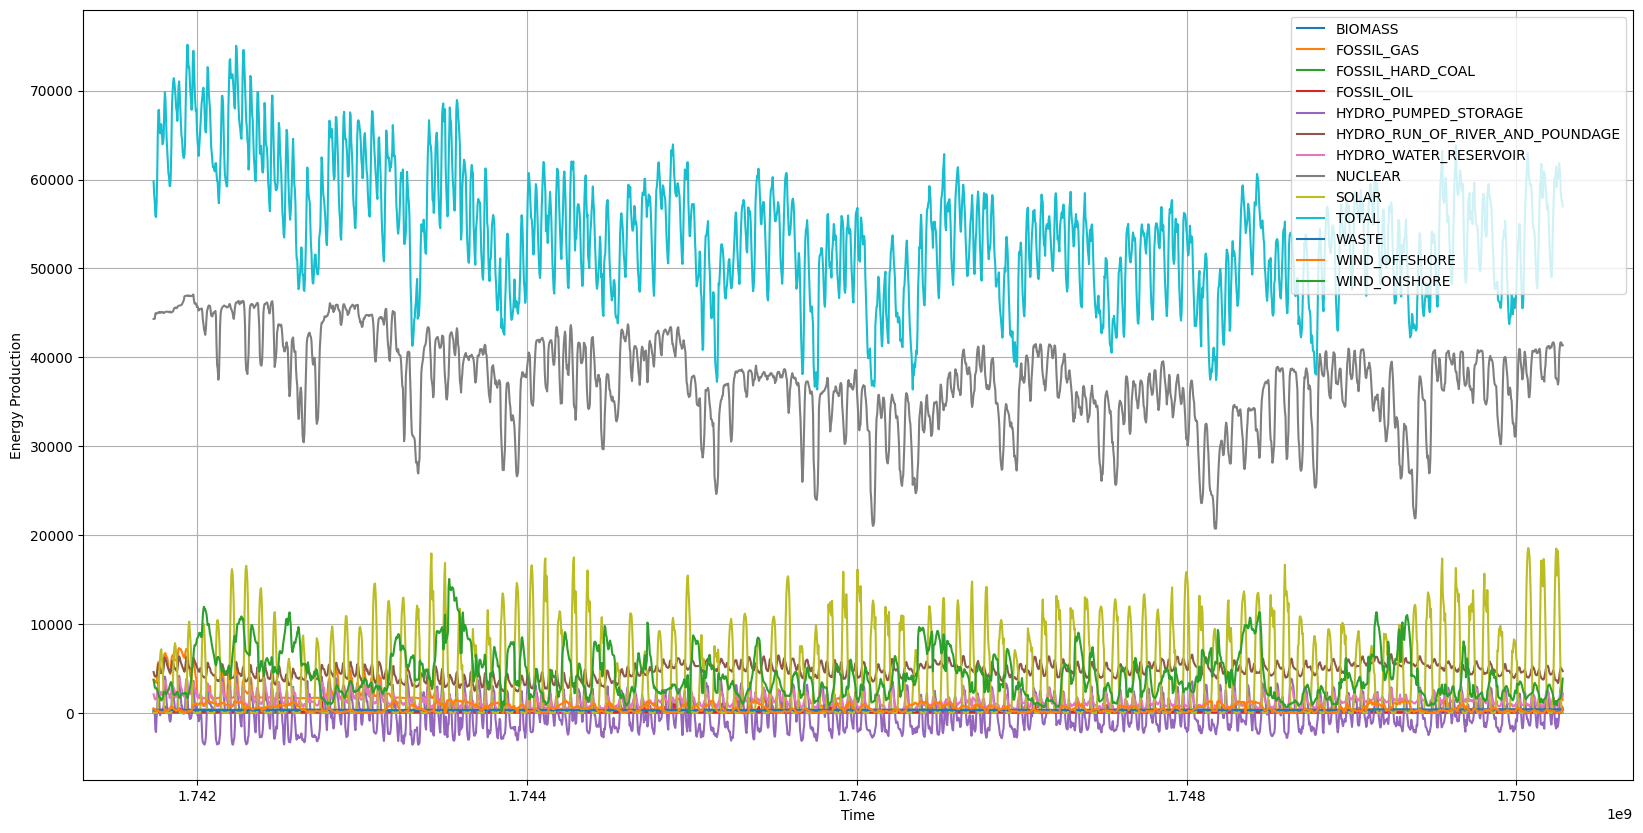

Biomass energy accounts for 0.6% of total energy production.
Fossil_gas energy accounts for 1.8% of total energy production.
Fossil_hard_coal energy accounts for 0.0% of total energy production.
Fossil_oil energy accounts for 0.2% of total energy production.
Hydro_pumped_storage energy accounts for -0.2% of total energy production.
Hydro_run_of_river_and_poundage energy accounts for 8.7% of total energy production.
Hydro_water_reservoir energy accounts for 2.5% of total energy production.
Nuclear energy accounts for 69.3% of total energy production.
Solar energy accounts for 7.7% of total energy production.
Waste energy accounts for 0.6% of total energy production.
Wind_offshore energy accounts for 0.9% of total energy production.
Wind_onshore energy accounts for 7.9% of total energy production.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for column in fused_dataframe.columns:
    if column == 'Time':
        continue
    plt.plot(fused_dataframe['Time'], fused_dataframe[column], label=column)
plt.xlabel("Time")
plt.ylabel("Energy Production")
plt.legend()
plt.grid()
plt.show()

for column in fused_dataframe.columns:
    if column in ['Time', 'TOTAL']:
        continue

    contribution = np.sum(
        fused_dataframe[column]) / np.sum(fused_dataframe['TOTAL'])
    print(f"{column.capitalize()} energy accounts for {contribution*100:.1f}% of total energy production.")